# Comparaison de l'interpolation des données météorologiques en fonction du nombre de plus proches voisins choisit

## Définition des paramètres

In [1]:
# Définition de la station de référence
REF_STATION_NAME = 'La Petite Claye'

# Météo-France API
METEOFRANCE_API = 'DPClim'

# Période des données
DATE_DEB_PERIODE = '2024-01-01T00:00:00Z'
DATE_FIN_PERIODE = '2024-12-31T23:00:00Z'

# Fréquence des données climatiques
METEOFRANCE_FREQUENCE = 'quotidienne'

# Plus proches voisins retenus
ID_DEPARTEMENTS = [35, 50]
NN_NOMBRE_ARR = [3, 9]

## Lecture des données météorologiques pour la station de référence

In [2]:
import meteofrance

# Initialisation d'un client pour configurer l'accès aux données Météo-France même si l'API n'est pas utilisée
client = meteofrance.Client(METEOFRANCE_API)

In [3]:
import pandas as pd

# Lecture des données de la station de référence pour les différents choix des plus proches voisins
df_meteo_ref_dict = {}
for nn_nombre in NN_NOMBRE_ARR:
    filepath_donnee = meteofrance.get_filepath_donnee_periode(
        client, DATE_DEB_PERIODE, DATE_FIN_PERIODE,
        frequence=METEOFRANCE_FREQUENCE,
        id_departements=ID_DEPARTEMENTS, nn_nombre=nn_nombre)
    
    str_ref_station_name = REF_STATION_NAME.lower().replace(' ', '')
    filepath_donnee_ref = filepath_donnee.with_name(
        filepath_donnee.stem + '_' + str_ref_station_name + filepath_donnee.suffix)

    df_meteo_ref_dict[nn_nombre] = pd.read_csv(
        filepath_donnee_ref, parse_dates=[client.time_label],
        index_col=client.time_label).stack()

df_meteo_ref_comp = pd.DataFrame(df_meteo_ref_dict).stack().unstack(0).transpose()

df_meteo_ref_comp

ETPGRILLE                   RR           
                   3         9          3          9
DATE                                                
2024-01-01  1.028326  0.994286  11.407057  11.668512
2024-01-02  1.137123  1.100415  10.106273   9.570334
2024-01-03  1.692918  1.658711   1.996128   1.873964
2024-01-04  1.029184  1.009146   1.300858   1.475322
2024-01-05  0.744205  0.739796   6.254496   6.142925
...              ...       ...        ...        ...
2024-12-27  0.207939  0.209624   0.127469   0.116365
2024-12-28  0.115878  0.113663   0.127469   0.124725
2024-12-29  0.000000  0.004411   0.000000   0.000000
2024-12-30  0.064592  0.065607   0.127469   0.130236
2024-12-31  0.244205  0.245128   0.143347   0.156621

[366 rows x 4 columns]

## Comparaison des séries temporelles

### Pour toute la période

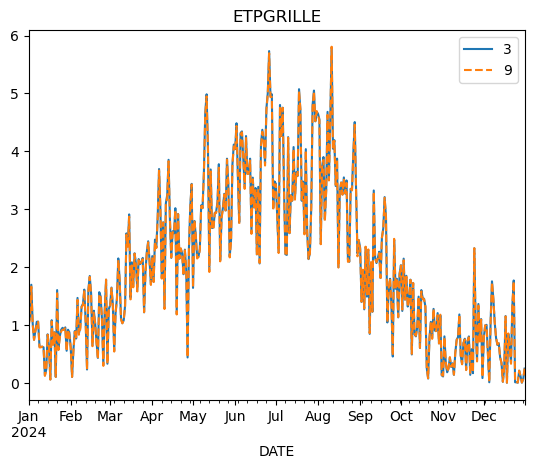

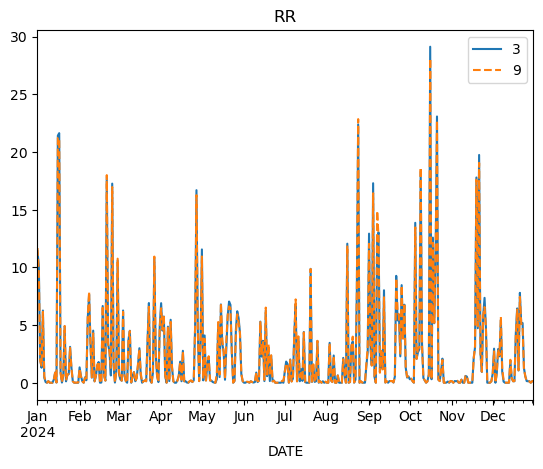

In [4]:
# Plot full time series
style = ['-', '--']
for variable in df_meteo_ref_comp.columns.levels[0]:
    df_meteo_ref_comp[variable].plot(style=style, title=variable)

### Pour l'été

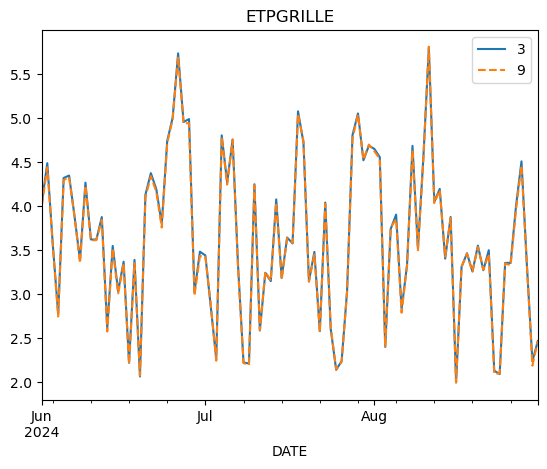

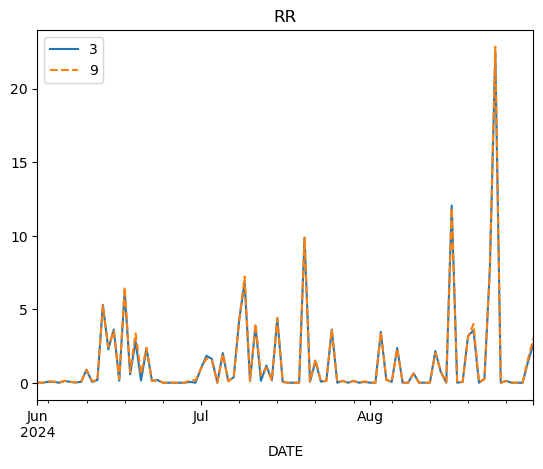

In [5]:
# Plot summer time series
SUMMER_MONTHS = [6, 7, 8]

year = df_meteo_ref_comp.index.year[0]
df_meteo_ref_comp_summer = pd.concat([df_meteo_ref_comp.loc[f"{year}-{month}"]
                                      for month in SUMMER_MONTHS], axis='index')

for variable in df_meteo_ref_comp.columns.levels[0]:
    df_meteo_ref_comp_summer[variable].plot(style=style, title=variable)